In [179]:
#pip install beautifulsoup4

In [230]:
import numpy as np

import tensorflow as tf

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier

from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [2]:
df = pd.read_csv('df4.csv')

In [3]:
df

,Unnamed: 0,RAM,ROM,Color,Display_Type,Display_Size,Front_Cam,Rear_Cam,Price,Display_Category,price
0,0,4,64,Blue,HD+,6.50,5.0,50.0,9999.0,"(6.38, 6.8]","(9317.605, 13336.209]"
1,1,6,128,Black,HD+,6.60,16.0,50.0,13499.0,"(6.38, 6.8]","(13336.209, 17354.814]"
2,2,8,128,Blue,HD+,6.70,16.0,108.0,25999.0,"(6.38, 6.8]","(25392.023, 29410.628]"
3,3,8,256,Blue,HD+,6.70,16.0,108.0,27999.0,"(6.38, 6.8]","(25392.023, 29410.628]"
4,5,4,64,Black,HD+,6.60,8.0,50.0,14999.0,"(6.38, 6.8]","(13336.209, 17354.814]"
...,...,...,...,...,...,...,...,...,...,...,...
1037,1838,4,64,Grey,HD+,6.53,13.0,48.0,14999.0,"(6.38, 6.8]","(13336.209, 17354.814]"
1038,1843,12,256,Black,AMOLED,6.43,50.0,50.0,36999.0,"(6.38, 6.8]","(33429.233, 37447.837]"
1039,1845,6,128,Silver,HD+,6.43,16.0,48.0,14990.0,"(6.38, 6.8]","(13336.209, 17354.814]"
1040,1846,4,64,Blue,HD+,6.53,5.0,13.0,7699.0,"(6.38, 6.8]","(5126.2, 9317.605]"


In [24]:
print(df['Front_Cam'].max() , df['Front_Cam'].min())

print(df['Rear_Cam'].max() , df['Rear_Cam'].min())

50.0 2.0
108.0 8.0


In [25]:
df[df['Rear_Cam'] == 108.0]

,Unnamed: 0,RAM,ROM,Color,Display_Type,Display_Size,Front_Cam,Rear_Cam,Price,Display_Category,price
2,2,8,128,Blue,HD+,6.70,16.0,108.0,25999.0,"(6.38, 6.8]","(25392.023, 29410.628]"
3,3,8,256,Blue,HD+,6.70,16.0,108.0,27999.0,"(6.38, 6.8]","(25392.023, 29410.628]"
5,6,6,128,Blue,HD+,6.70,16.0,108.0,24999.0,"(6.38, 6.8]","(21373.419, 25392.023]"
112,145,8,128,Gold,AMOLED,6.40,16.0,108.0,17999.0,"(6.38, 6.8]","(17354.814, 21373.419]"
113,146,8,128,Black,AMOLED,6.40,16.0,108.0,17999.0,"(6.38, 6.8]","(17354.814, 21373.419]"
114,147,6,128,Gold,AMOLED,6.40,16.0,108.0,16999.0,"(6.38, 6.8]","(13336.209, 17354.814]"
197,252,8,128,Blue,HD+,6.40,16.0,108.0,19999.0,"(6.38, 6.8]","(17354.814, 21373.419]"
199,254,6,128,Black,HD+,6.40,16.0,108.0,17999.0,"(6.38, 6.8]","(17354.814, 21373.419]"
204,259,6,128,Yellow,HD+,6.40,16.0,108.0,17999.0,"(6.38, 6.8]","(17354.814, 21373.419]"
269,346,8,128,Black,HD+,6.72,16.0,108.0,20999.0,"(6.38, 6.8]","(17354.814, 21373.419]"


In [21]:
df = df.drop(index = df[(df['Rear_Cam'] == 200.0)].index)

In [22]:
df

,Unnamed: 0,RAM,ROM,Color,Display_Type,Display_Size,Front_Cam,Rear_Cam,Price,Display_Category,price
0,0,4,64,Blue,HD+,6.50,5.0,50.0,9999.0,"(6.38, 6.8]","(9317.605, 13336.209]"
1,1,6,128,Black,HD+,6.60,16.0,50.0,13499.0,"(6.38, 6.8]","(13336.209, 17354.814]"
2,2,8,128,Blue,HD+,6.70,16.0,108.0,25999.0,"(6.38, 6.8]","(25392.023, 29410.628]"
3,3,8,256,Blue,HD+,6.70,16.0,108.0,27999.0,"(6.38, 6.8]","(25392.023, 29410.628]"
4,5,4,64,Black,HD+,6.60,8.0,50.0,14999.0,"(6.38, 6.8]","(13336.209, 17354.814]"
...,...,...,...,...,...,...,...,...,...,...,...
1037,1838,4,64,Grey,HD+,6.53,13.0,48.0,14999.0,"(6.38, 6.8]","(13336.209, 17354.814]"
1038,1843,12,256,Black,AMOLED,6.43,50.0,50.0,36999.0,"(6.38, 6.8]","(33429.233, 37447.837]"
1039,1845,6,128,Silver,HD+,6.43,16.0,48.0,14990.0,"(6.38, 6.8]","(13336.209, 17354.814]"
1040,1846,4,64,Blue,HD+,6.53,5.0,13.0,7699.0,"(6.38, 6.8]","(5126.2, 9317.605]"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1042 non-null   int64  
 1   RAM               1042 non-null   int64  
 2   ROM               1042 non-null   int64  
 3   Color             1042 non-null   object 
 4   Display_Type      1042 non-null   object 
 5   Display_Size      1042 non-null   float64
 6   Front_Cam         1042 non-null   float64
 7   Rear_Cam          1042 non-null   float64
 8   Price             1042 non-null   float64
 9   Display_Category  1042 non-null   object 
 10  price             1042 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 89.7+ KB


In [38]:
print(df['RAM'].unique())

print(df['ROM'].unique())

print(df['Color'].unique())

print(df['Display_Type'].unique())

print(df['Rear_Cam'].unique())

print(df['Front_Cam'].unique())

#print(df['price'].unique())




[4 6 8 2 3 12 128 64 256 512 32 16]
[64 128 256 32 16 512]
['Blue' 'Black' 'Gold' 'Grey' 'Green' 'White' 'Silver' 'Yellow' 'Purple'
 'Orange' 'Pearl' 'Carbon']
['HD+' 'AMOLED' 'HD' 'XDR' 'Retina']
[50.0 108.0 8.0 64.0 48.0 13.0 12.0 16.0 20.0]
[5.0 16.0 8.0 32.0 13.0 25.0 20.0 2.0 4.0 12.0 7.0 50.0 44.0 24.0]


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1041
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1018 non-null   int64  
 1   RAM               1018 non-null   object 
 2   ROM               1018 non-null   object 
 3   Color             1018 non-null   object 
 4   Display_Type      1018 non-null   object 
 5   Display_Size      1018 non-null   float64
 6   Front_Cam         1018 non-null   object 
 7   Rear_Cam          1018 non-null   object 
 8   Price             1018 non-null   float64
 9   Display_Category  1018 non-null   object 
 10  price             1018 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 95.4+ KB


In [40]:
print(df['Display_Size'].min() , df['Display_Size'].max())

4.7 6.8


In [50]:
df['display_size'] = pd.cut(df['Display_Size'], bins=8)

In [53]:
data = df[['RAM' , 'ROM' , 'Color' , 'Display_Type' , 'display_size' , 'Front_Cam' , 'Rear_Cam' , 'price']]

In [54]:
data

,RAM,ROM,Color,Display_Type,display_size,Front_Cam,Rear_Cam,price
0,4,64,Blue,HD+,"(6.275, 6.538]",5.0,50.0,"(9317.605, 13336.209]"
1,6,128,Black,HD+,"(6.538, 6.8]",16.0,50.0,"(13336.209, 17354.814]"
2,8,128,Blue,HD+,"(6.538, 6.8]",16.0,108.0,"(25392.023, 29410.628]"
3,8,256,Blue,HD+,"(6.538, 6.8]",16.0,108.0,"(25392.023, 29410.628]"
4,4,64,Black,HD+,"(6.538, 6.8]",8.0,50.0,"(13336.209, 17354.814]"
...,...,...,...,...,...,...,...,...
1037,4,64,Grey,HD+,"(6.275, 6.538]",13.0,48.0,"(13336.209, 17354.814]"
1038,12,256,Black,AMOLED,"(6.275, 6.538]",50.0,50.0,"(33429.233, 37447.837]"
1039,6,128,Silver,HD+,"(6.275, 6.538]",16.0,48.0,"(13336.209, 17354.814]"
1040,4,64,Blue,HD+,"(6.275, 6.538]",5.0,13.0,"(5126.2, 9317.605]"


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   RAM           1018 non-null   object  
 1   ROM           1018 non-null   object  
 2   Color         1018 non-null   object  
 3   Display_Type  1018 non-null   object  
 4   display_size  1018 non-null   category
 5   Front_Cam     1018 non-null   object  
 6   Rear_Cam      1018 non-null   object  
 7   price         1018 non-null   object  
dtypes: category(1), object(7)
memory usage: 65.0+ KB


(array([ 52.,   6.,  30.,  54.,  60., 134., 419., 263.]),
 array([4.7   , 4.9625, 5.225 , 5.4875, 5.75  , 6.0125, 6.275 , 6.5375,
        6.8   ]),
 <BarContainer object of 8 artists>)

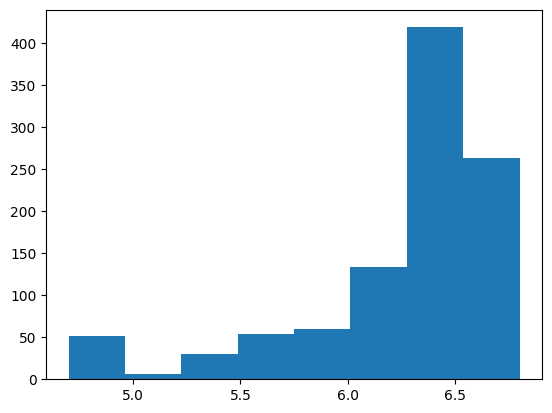

In [49]:
plt.hist(df['Display_Size'], bins=8)

In [37]:
#df["Rear_Cam"] = df['Rear_Cam'].astype(object)

#df["Front_Cam"] = df['Front_Cam'].astype(object)

df['RAM'] = df['RAM'].astype(object)

df['ROM'] = df['ROM'].astype(object)

In [32]:
df['Rear_Cam'].unique()

array([50.0, 108.0, 8.0, 64.0, 48.0, 13.0, 12.0, 16.0, 20.0], dtype=object)

In [29]:
df['Front_Cam'].unique()

array([ 5., 16.,  8., 32., 13., 25., 20.,  2.,  4., 12.,  7., 50., 44.,
       24.])

In [58]:
data

,RAM,ROM,Color,Display_Type,display_size,Front_Cam,Rear_Cam,price
0,4,64,Blue,HD+,"(6.275, 6.538]",5.0,50.0,"(9317.605, 13336.209]"
1,6,128,Black,HD+,"(6.538, 6.8]",16.0,50.0,"(13336.209, 17354.814]"
2,8,128,Blue,HD+,"(6.538, 6.8]",16.0,108.0,"(25392.023, 29410.628]"
3,8,256,Blue,HD+,"(6.538, 6.8]",16.0,108.0,"(25392.023, 29410.628]"
4,4,64,Black,HD+,"(6.538, 6.8]",8.0,50.0,"(13336.209, 17354.814]"
...,...,...,...,...,...,...,...,...
1037,4,64,Grey,HD+,"(6.275, 6.538]",13.0,48.0,"(13336.209, 17354.814]"
1038,12,256,Black,AMOLED,"(6.275, 6.538]",50.0,50.0,"(33429.233, 37447.837]"
1039,6,128,Silver,HD+,"(6.275, 6.538]",16.0,48.0,"(13336.209, 17354.814]"
1040,4,64,Blue,HD+,"(6.275, 6.538]",5.0,13.0,"(5126.2, 9317.605]"


In [59]:
data2 = data.copy(deep = True)

In [60]:
le = LabelEncoder()

for i in data2.columns:
    data2[i] = le.fit_transform(data2[i])

In [61]:
data2

,RAM,ROM,Color,Display_Type,display_size,Front_Cam,Rear_Cam,price
0,2,2,1,2,6,2,6,33
1,3,3,0,2,7,7,6,7
2,4,3,1,2,7,7,8,15
3,4,4,1,2,7,7,8,15
4,2,2,0,2,7,4,6,7
...,...,...,...,...,...,...,...,...
1037,2,2,5,2,6,6,5,7
1038,5,4,0,0,6,13,6,17
1039,3,3,9,2,6,7,5,7
1040,2,2,1,2,6,2,2,22


In [67]:
X = data2.iloc[: , data2.columns!='price']

Y = data2['price']

In [68]:
xtrain , xtest , ytrain , ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 1 , shuffle = True , stratify = Y)

In [69]:
print(xtrain.shape)

print(xtest.shape)

print(ytrain.shape)

print(ytest.shape)

(814, 7)
(204, 7)
(814,)
(204,)


In [70]:
rf = RandomForestClassifier()

rf.fit(xtrain , ytrain)

RandomForestClassifier()

In [71]:
ypred = rf.predict(xtest)

In [73]:
accuracy_score(ypred , ytest)

0.5980392156862745

In [77]:
ada = AdaBoostClassifier()

ada.fit(xtrain , ytrain)

AdaBoostClassifier()

In [78]:
apred = ada.predict(xtest)

In [79]:
accuracy_score(apred , ytest)

0.27450980392156865

In [156]:
data2.price.nunique()

36

In [86]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512 , activation = 'relu'),
        tf.keras.layers.Dense(264 , activation = 'relu'),
        tf.keras.layers.Dense(232 , activation = 'relu'),
        tf.keras.layers.Dense(128 , activation = 'relu'),
        tf.keras.layers.Dense(64 , activation = 'relu'),
        tf.keras.layers.Dense(43 , activation = 'softmax')
      ])



In [87]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [91]:
model.fit(xtrain , ytrain , epochs = 100)

Epoch 1/100
26/26 [==============================] - 0s 6ms/step - loss: 0.2895 - accuracy: 0.8587
Epoch 2/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2947 - accuracy: 0.8624
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 0.3269 - accuracy: 0.8563
Epoch 4/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2916 - accuracy: 0.8722
Epoch 5/100
26/26 [==============================] - 0s 7ms/step - loss: 0.3063 - accuracy: 0.8538
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.3200 - accuracy: 0.8464
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 0.3135 - accuracy: 0.8489
Epoch 8/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2806 - accuracy: 0.8771
Epoch 9/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2690 - accuracy: 0.8661
Epoch 10/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2937 - accuracy: 0.8698
Epoch 11/

Epoch 83/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2305 - accuracy: 0.8771
Epoch 84/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2378 - accuracy: 0.8722
Epoch 85/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2303 - accuracy: 0.8747
Epoch 86/100
26/26 [==============================] - 0s 6ms/step - loss: 0.2286 - accuracy: 0.8747
Epoch 87/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2152 - accuracy: 0.8857
Epoch 88/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2289 - accuracy: 0.8759
Epoch 89/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2354 - accuracy: 0.8833
Epoch 90/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2285 - accuracy: 0.8808
Epoch 91/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2182 - accuracy: 0.8710
Epoch 92/100
26/26 [==============================] - 0s 7ms/step - loss: 0.2275 - accuracy: 0.8808


In [94]:
model.evaluate(xtest , ytest)

7/7 [==============================] - 0s 4ms/step - loss: 3.4778 - accuracy: 0.5147


[3.4778010845184326, 0.5147058963775635]

In [95]:
mpred = model.predict(xtest)

7/7 [==============================] - 0s 3ms/step


In [97]:
mpred[1].shape

(43,)

In [99]:
data2.columns

Index(['RAM', 'ROM', 'Color', 'Display_Type', 'display_size', 'Front_Cam',
       'Rear_Cam', 'price'],
      dtype='object')

In [110]:
xtrain[1:2].values

array([[11,  5,  4,  4,  2,  5,  1]])

In [113]:
np.max(model.predict(xtrain[1:2].values))

1/1 [==============================] - 0s 32ms/step


0.998796

In [116]:
ytrain[1:2].values

array([32])

In [117]:
le.inverse_transform(ytrain[1:2].values)

array(['(89689.698, 93708.302]'], dtype=object)

In [115]:
model.predict(xtrain[1:2].values)

1/1 [==============================] - 0s 25ms/step


array([[2.46152308e-06, 1.04979415e-06, 1.17846691e-10, 9.61534522e-14,
        1.01166749e-10, 2.08949764e-08, 2.77770749e-08, 7.13130726e-13,
        9.75156809e-08, 4.54921479e-04, 2.38766824e-13, 1.13406735e-07,
        3.24985438e-12, 7.29264001e-17, 3.05838579e-13, 1.71860831e-10,
        2.93401058e-07, 7.08154033e-08, 5.13431928e-07, 1.62587543e-08,
        3.32689954e-18, 2.24948185e-08, 4.49978188e-06, 3.51259928e-07,
        1.47794618e-13, 4.37296683e-15, 1.02147360e-12, 5.91895659e-05,
        3.74258198e-05, 3.65865797e-16, 6.42815663e-04, 4.80368054e-15,
        9.98795986e-01, 1.74568358e-20, 2.84071748e-15, 1.00646091e-07,
        1.75875034e-13, 4.26350659e-17, 5.11485995e-14, 1.19744357e-13,
        7.14995842e-15, 1.44270216e-13, 6.34189619e-12]], dtype=float32)

In [132]:
xtrain.shape

(814, 7)

In [133]:
ytrain.shape

(814,)

In [130]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

# define input shape
inputs = Input(shape=(xtrain.shape[1]),)

# define embedding layer
embedding_layer = Embedding(input_dim=100, output_dim=16, input_length=xtrain.shape[1])(inputs)

# flatten embeddings
x = Flatten()(embedding_layer)

# define fully connected layers
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)

# output layer
output = Dense(43, activation='softmax')(x)

# create model
model = Model(inputs=inputs, outputs=output)

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# print summary of model architecture
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 embedding_1 (Embedding)     (None, 7, 16)             1600      
                                                                 
 flatten_1 (Flatten)         (None, 112)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                7232      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 43)                1419  

In [135]:
X_train.shape[1]

7

In [140]:
#for i in range(X_train.shape[1]):
    #print(X_train[i].nunique())
    
for col_name in X_train.columns:
    print(X_train[col_name].nunique())

12
6
12
4
8
13
9


In [144]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Concatenate, Dense, Flatten
from tensorflow.keras.models import Model

# Load the data
X_train = xtrain# load the training data
y_train = ytrain# load the training labels

# Define input layers
inputs = []
embeddings = []
print(X_train.columns)
#f#or i in range(X_train.shape[1]):
for i in X_train.columns:
    input_i = Input(shape=(1,))
    embedding_i = Embedding(input_dim=X_train[i].nunique(), output_dim=10)(input_i)
    inputs.append(input_i)
    embeddings.append(embedding_i)

# Concatenate embeddings
x = Concatenate()(embeddings)

# Flatten embeddings
x = Flatten()(x)

# Define fully connected layers
x = Dense(units=64, activation='relu')(x)
x = Dense(units=32, activation='relu')(x)

# Define output layer
outputs = Dense(units=y_train.nunique(), activation='softmax')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Fit the model
model.fit(x=[X_train.iloc[:, i] for i in range(X_train.shape[1])], y=y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


Index(['RAM', 'ROM', 'Color', 'Display_Type', 'display_size', 'Front_Cam',
       'Rear_Cam'],
      dtype='object')
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_15 (InputLayer)          [(None, 1)]          0           []       

2023-04-20 01:10:06.992523: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: indices[20,0] = 13 is not in [0, 13)
	 [[{{node model_2/embedding_14/embedding_lookup}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'model_2/embedding_14/embedding_lookup' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib64/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib64/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/usr/lib64/python3.11/asyncio/base_events.py", line 1919, in _run_once
      handle._run()
    File "/usr/lib64/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_49848/969953395.py", line 43, in <module>
      model.fit(x=[X_train.iloc[:, i] for i in range(X_train.shape[1])], y=y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/layers/core/embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_2/embedding_14/embedding_lookup'
indices[20,0] = 13 is not in [0, 13)
	 [[{{node model_2/embedding_14/embedding_lookup}}]] [Op:__inference_train_function_34761]

In [143]:
from keras.utils import to_categorical

num_classes = len(y_train.unique())
y_train_encoded = to_categorical(y_train, num_classes=num_classes)

In [148]:
xtrain

,RAM,ROM,Color,Display_Type,display_size,Front_Cam,Rear_Cam
706,9,3,9,1,0,2,1
583,11,5,4,4,2,5,1
884,4,3,0,0,6,7,7
961,2,2,4,2,7,4,2
112,4,3,3,0,6,7,8
...,...,...,...,...,...,...,...
528,1,1,1,2,4,2,1
852,3,3,0,2,6,7,5
481,3,2,3,2,5,8,1
154,5,4,4,2,6,11,7


In [157]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model

# Define input layers
input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))

# Define embedding layers
embedding_1 = Embedding(input_dim=12, output_dim=10)(input_1)
embedding_2 = Embedding(input_dim=6, output_dim=10)(input_2)
embedding_3 = Embedding(input_dim=12, output_dim=10)(input_3)
embedding_4 = Embedding(input_dim=4, output_dim=10)(input_4)
embedding_5 = Embedding(input_dim=8, output_dim=10)(input_5)
embedding_6 = Embedding(input_dim=13, output_dim=10)(input_6)
embedding_7 = Embedding(input_dim=9, output_dim=10)(input_7)

# Concatenate the embeddings
concatenated_embeddings = Concatenate(axis=-1)([embedding_1, embedding_2, embedding_3, embedding_4, embedding_5, embedding_6, embedding_7])

# Flatten the concatenated embeddings
flattened_embeddings = Flatten()(concatenated_embeddings)

# Add a dense layer
dense_1 = Dense(units=64, activation='relu')(flattened_embeddings)

# Add another dense layer
dense_2 = Dense(units=32, activation='relu')(dense_1)

# Add a final dense layer with softmax activation for multi-class classification
output = Dense(units=36, activation='softmax')(dense_2)

# Define the model
model = Model(inputs=[input_1, input_2, input_3, input_4, input_5, input_6, input_7], outputs=output)

# Compile the model with appropriate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [152]:
y_train_encoded[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0.], dtype=float32)

In [155]:
ytrain.nunique()

36

In [160]:
model.fit(xtrain , y_train_encoded)

ValueError: in user code:

    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model_4" expects 7 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 7) dtype=int64>]


In [158]:
model.fit(x=[X_train.iloc[:, i] for i in range(X_train.shape[1])], y=y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


2023-04-20 01:20:20.199796: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: indices[16,0] = 4 is not in [0, 4)
	 [[{{node model_4/embedding_26/embedding_lookup}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'model_4/embedding_26/embedding_lookup' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib64/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib64/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/usr/lib64/python3.11/asyncio/base_events.py", line 1919, in _run_once
      handle._run()
    File "/usr/lib64/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_49848/661438530.py", line 1, in <module>
      model.fit(x=[X_train.iloc[:, i] for i in range(X_train.shape[1])], y=y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/layers/core/embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_4/embedding_26/embedding_lookup'
indices[16,0] = 4 is not in [0, 4)
	 [[{{node model_4/embedding_26/embedding_lookup}}]] [Op:__inference_train_function_37446]

In [163]:
data2.head(5)

,RAM,ROM,Color,Display_Type,display_size,Front_Cam,Rear_Cam,price
0,2,2,1,2,6,2,6,33
1,3,3,0,2,7,7,6,7
2,4,3,1,2,7,7,8,15
3,4,4,1,2,7,7,8,15
4,2,2,0,2,7,4,6,7


In [170]:
import tensorflow as tf

# Define the number of classes
num_classes = 36

# Define the input shape
input_shape = (7,)

# Define the input layer
input_layer = tf.keras.layers.Input(shape=input_shape)

# Define the embedding layers for each categorical feature
ram_embedding_layer = tf.keras.layers.Embedding(input_dim=12, output_dim=3)(input_layer[:,0])
rom_embedding_layer = tf.keras.layers.Embedding(input_dim=6, output_dim=3)(input_layer[:,1])
color_embedding_layer = tf.keras.layers.Embedding(input_dim=12, output_dim=2)(input_layer[:,2])
display_type_embedding_layer = tf.keras.layers.Embedding(input_dim=4, output_dim=2)(input_layer[:,3])
display_size_embedding_layer = tf.keras.layers.Embedding(input_dim=8, output_dim=5)(input_layer[:,4])
front_cam_embedding_layer = tf.keras.layers.Embedding(input_dim=13, output_dim=4)(input_layer[:,5])
rear_cam_embedding_layer = tf.keras.layers.Embedding(input_dim=9, output_dim=4)(input_layer[:,6])

# Concatenate the embedding layers
concatenated_embeddings = tf.keras.layers.concatenate([
    ram_embedding_layer,
    rom_embedding_layer,
    color_embedding_layer,
    display_type_embedding_layer,
    display_size_embedding_layer,
    front_cam_embedding_layer,
    rear_cam_embedding_layer
])

# Flatten the concatenated embeddings
flattened_embeddings = tf.keras.layers.Flatten()(concatenated_embeddings)

# Define the fully connected layers
dense_layer_1 = tf.keras.layers.Dense(units=64, activation='relu')(flattened_embeddings)
dropout_layer_1 = tf.keras.layers.Dropout(rate=0.2)(dense_layer_1)
dense_layer_2 = tf.keras.layers.Dense(units=32, activation='relu')(dropout_layer_1)
dropout_layer_2 = tf.keras.layers.Dropout(rate=0.2)(dense_layer_2)

# Define the output layer
output_layer = tf.keras.layers.Dense(units=num_classes, activation='softmax')(dropout_layer_2)

# Define the model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [172]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# fit the model
history = model.fit(xtrain, y_train_encoded, epochs=10, validation_data=(xtest, ytest))


Epoch 1/10


2023-04-20 01:41:52.000102: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: indices[3] = 4 is not in [0, 4)
	 [[{{node model_6/embedding_40/embedding_lookup}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'model_6/embedding_40/embedding_lookup' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib64/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib64/python3.11/asyncio/base_events.py", line 607, in run_forever
      self._run_once()
    File "/usr/lib64/python3.11/asyncio/base_events.py", line 1919, in _run_once
      handle._run()
    File "/usr/lib64/python3.11/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_49848/693130469.py", line 7, in <module>
      history = model.fit(xtrain, y_train_encoded, epochs=10, validation_data=(xtest, ytest))
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/engine/base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/sharanbalakrishnan/Desktop/InternProj/project/lib/python3.11/site-packages/keras/layers/core/embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_6/embedding_40/embedding_lookup'
indices[3] = 4 is not in [0, 4)
	 [[{{node model_6/embedding_40/embedding_lookup}}]] [Op:__inference_train_function_44723]

In [173]:
data2

,RAM,ROM,Color,Display_Type,display_size,Front_Cam,Rear_Cam,price
0,2,2,1,2,6,2,6,33
1,3,3,0,2,7,7,6,7
2,4,3,1,2,7,7,8,15
3,4,4,1,2,7,7,8,15
4,2,2,0,2,7,4,6,7
...,...,...,...,...,...,...,...,...
1037,2,2,5,2,6,6,5,7
1038,5,4,0,0,6,13,6,17
1039,3,3,9,2,6,7,5,7
1040,2,2,1,2,6,2,2,22


In [175]:
df

,Unnamed: 0,RAM,ROM,Color,Display_Type,Display_Size,Front_Cam,Rear_Cam,Price,Display_Category,price,display_size
0,0,4,64,Blue,HD+,6.50,5.0,50.0,9999.0,"(6.38, 6.8]","(9317.605, 13336.209]","(6.275, 6.538]"
1,1,6,128,Black,HD+,6.60,16.0,50.0,13499.0,"(6.38, 6.8]","(13336.209, 17354.814]","(6.538, 6.8]"
2,2,8,128,Blue,HD+,6.70,16.0,108.0,25999.0,"(6.38, 6.8]","(25392.023, 29410.628]","(6.538, 6.8]"
3,3,8,256,Blue,HD+,6.70,16.0,108.0,27999.0,"(6.38, 6.8]","(25392.023, 29410.628]","(6.538, 6.8]"
4,5,4,64,Black,HD+,6.60,8.0,50.0,14999.0,"(6.38, 6.8]","(13336.209, 17354.814]","(6.538, 6.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1838,4,64,Grey,HD+,6.53,13.0,48.0,14999.0,"(6.38, 6.8]","(13336.209, 17354.814]","(6.275, 6.538]"
1038,1843,12,256,Black,AMOLED,6.43,50.0,50.0,36999.0,"(6.38, 6.8]","(33429.233, 37447.837]","(6.275, 6.538]"
1039,1845,6,128,Silver,HD+,6.43,16.0,48.0,14990.0,"(6.38, 6.8]","(13336.209, 17354.814]","(6.275, 6.538]"
1040,1846,4,64,Blue,HD+,6.53,5.0,13.0,7699.0,"(6.38, 6.8]","(5126.2, 9317.605]","(6.275, 6.538]"


In [186]:
import requests
import csv
from bs4 import BeautifulSoup

# The URL of the page
url = "https://www.mysmartprice.com/mobile/pricelist/big-screen-phones-price-list-in-india.html"

# Fetch the HTML content of the page
response = requests.get(url)
html_content = response.text

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find all smartphone rows in the table
rows = soup.select("table.pricelist-table tr")[1:]

# Extract the specifications of each smartphone
records = []
for row in rows:
    specs = row.select("td")
    name = specs[1].find("a").text.strip()
    processor = specs[3].text.strip()
    rear_camera = specs[4].text.strip()
    front_camera = specs[5].text.strip()
    display = specs[6].text.strip()
    ram_storage = specs[7].text.strip()
    battery = specs[8].text.strip()
    os = specs[9].text.strip()
    connectivity = specs[10].text.strip()
    record = {"Name": name, "Processor": processor, "Rear Camera": rear_camera, "Front Camera": front_camera, "Display": display, "RAM & Storage": ram_storage, "Battery": battery, "Operating System": os, "Connectivity": connectivity}
    records.append(record)

# Write the data to a CSV file
with open("big_screen_phones.csv", "w", newline="", encoding="utf-8") as csvfile:
    fieldnames = ["Name", "Processor", "Rear Camera", "Front Camera", "Display", "RAM & Storage", "Battery", "Operating System", "Connectivity"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for record in records:
        writer.writerow(record)


In [189]:
fr = soup.select("prdct-item__dtls amd-cls-icon")


In [200]:
import requests
from bs4 import BeautifulSoup
import csv

url = "https://www.mysmartprice.com/mobile/pricelist/big-screen-phones-price-list-in-india.html"

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

items = soup.select(".prdct-item__dtls")

with open("mobile_phones.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Brand", "Model", "Price", "Battery", "Operating System", "5G", "Fingerprint Sensor"])
    
    for item in items:
        brand = item.select(".prdct-item__manufacturer")[0].text
        model = item.select(".prdct-item__name")[0].text
        price = item.select(".prdct-item__price")[0].text
        try:
            features = item.select(".prdct-item__spcftn.kyspc__item--5G")[0].text.split("|")
            has_5g = "Yes" if "5G" in features else "No"
            has_fingerprint_sensor = "Yes" if "Fingerprint Sensor" in features else "No"
        except IndexError:
            has_5g = "N/A"
            has_fingerprint_sensor = "N/A"
        battery = item.select(".prdct-item__spcftn.kyspc__item--bttry")[0].text.split("|")[0].strip()
        os = item.select(".prdct-item__spcftn.kyspc__item--os")[0].text.split()[0]
        
        writer.writerow([brand, model, price, battery, os, has_5g, has_fingerprint_sensor])


IndexError: list index out of range

In [202]:
df

,Unnamed: 0,RAM,ROM,Color,Display_Type,Display_Size,Front_Cam,Rear_Cam,Price,Display_Category,price,display_size
0,0,4,64,Blue,HD+,6.50,5.0,50.0,9999.0,"(6.38, 6.8]","(9317.605, 13336.209]","(6.275, 6.538]"
1,1,6,128,Black,HD+,6.60,16.0,50.0,13499.0,"(6.38, 6.8]","(13336.209, 17354.814]","(6.538, 6.8]"
2,2,8,128,Blue,HD+,6.70,16.0,108.0,25999.0,"(6.38, 6.8]","(25392.023, 29410.628]","(6.538, 6.8]"
3,3,8,256,Blue,HD+,6.70,16.0,108.0,27999.0,"(6.38, 6.8]","(25392.023, 29410.628]","(6.538, 6.8]"
4,5,4,64,Black,HD+,6.60,8.0,50.0,14999.0,"(6.38, 6.8]","(13336.209, 17354.814]","(6.538, 6.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1838,4,64,Grey,HD+,6.53,13.0,48.0,14999.0,"(6.38, 6.8]","(13336.209, 17354.814]","(6.275, 6.538]"
1038,1843,12,256,Black,AMOLED,6.43,50.0,50.0,36999.0,"(6.38, 6.8]","(33429.233, 37447.837]","(6.275, 6.538]"
1039,1845,6,128,Silver,HD+,6.43,16.0,48.0,14990.0,"(6.38, 6.8]","(13336.209, 17354.814]","(6.275, 6.538]"
1040,1846,4,64,Blue,HD+,6.53,5.0,13.0,7699.0,"(6.38, 6.8]","(5126.2, 9317.605]","(6.275, 6.538]"


In [203]:
dataset = df[['RAM' , 'ROM' , 'Color' , 'Display_Type' , 'Display_Category' , 'Front_Cam' , 'Rear_Cam' , 'price']]

In [204]:
dataset

,RAM,ROM,Color,Display_Type,Display_Category,Front_Cam,Rear_Cam,price
0,4,64,Blue,HD+,"(6.38, 6.8]",5.0,50.0,"(9317.605, 13336.209]"
1,6,128,Black,HD+,"(6.38, 6.8]",16.0,50.0,"(13336.209, 17354.814]"
2,8,128,Blue,HD+,"(6.38, 6.8]",16.0,108.0,"(25392.023, 29410.628]"
3,8,256,Blue,HD+,"(6.38, 6.8]",16.0,108.0,"(25392.023, 29410.628]"
4,4,64,Black,HD+,"(6.38, 6.8]",8.0,50.0,"(13336.209, 17354.814]"
...,...,...,...,...,...,...,...,...
1037,4,64,Grey,HD+,"(6.38, 6.8]",13.0,48.0,"(13336.209, 17354.814]"
1038,12,256,Black,AMOLED,"(6.38, 6.8]",50.0,50.0,"(33429.233, 37447.837]"
1039,6,128,Silver,HD+,"(6.38, 6.8]",16.0,48.0,"(13336.209, 17354.814]"
1040,4,64,Blue,HD+,"(6.38, 6.8]",5.0,13.0,"(5126.2, 9317.605]"


In [225]:
cols = ['RAM', 'ROM', 'Color', 'Display_Type', 'Display_Category' , 'price']
#target = ['price']
le = LabelEncoder()
mm = MinMaxScaler()

for i in dataset.columns:
    if i not in cols:
        dataset[[i]] = mm.fit_transform(dataset[[i]])
    else:
        dataset[i] = le.fit_transform(dataset[[i]])
    

/home/sharanbalakrishnan/Desktop/InternProj/project/lib64/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_49848/161934523.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[i] = le.fit_transform(dataset[[i]])
/home/sharanbalakrishnan/Desktop/InternProj/project/lib64/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipyke

In [226]:
dataset

,RAM,ROM,Color,Display_Type,Display_Category,Front_Cam,Rear_Cam,price
0,2,2,1,2,4,0.062500,0.42,33
1,3,3,0,2,4,0.291667,0.42,7
2,4,3,1,2,4,0.291667,1.00,15
3,4,4,1,2,4,0.291667,1.00,15
4,2,2,0,2,4,0.125000,0.42,7
...,...,...,...,...,...,...,...,...
1037,2,2,5,2,4,0.229167,0.40,7
1038,5,4,0,0,4,1.000000,0.42,17
1039,3,3,9,2,4,0.291667,0.40,7
1040,2,2,1,2,4,0.062500,0.05,22


In [232]:
xx = dataset.iloc[: , dataset.columns!='price']

yy = dataset['price']

In [231]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [235]:
x_train , x_test  , y_train , y_test = train_test_split(xx , yy , random_state = 1 , shuffle = True)

In [236]:
print(x_train.shape)

print(y_train.shape)

print(x_test.shape)

print(y_test.shape)

(763, 7)
(763,)
(255, 7)
(255,)


In [237]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [241]:
kpred = knn.predict(x_test)

In [242]:
print(len(kpred))
print(len(y_test))

255
255


In [243]:
accuracy_score(kpred , y_test)

0.39215686274509803